Time Series Classification and Clustering  
https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb

# 生成曲线

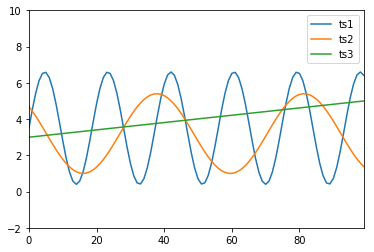

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math

x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

# 三种不同的相似度度量

## 欧式距离 Euclidean distance

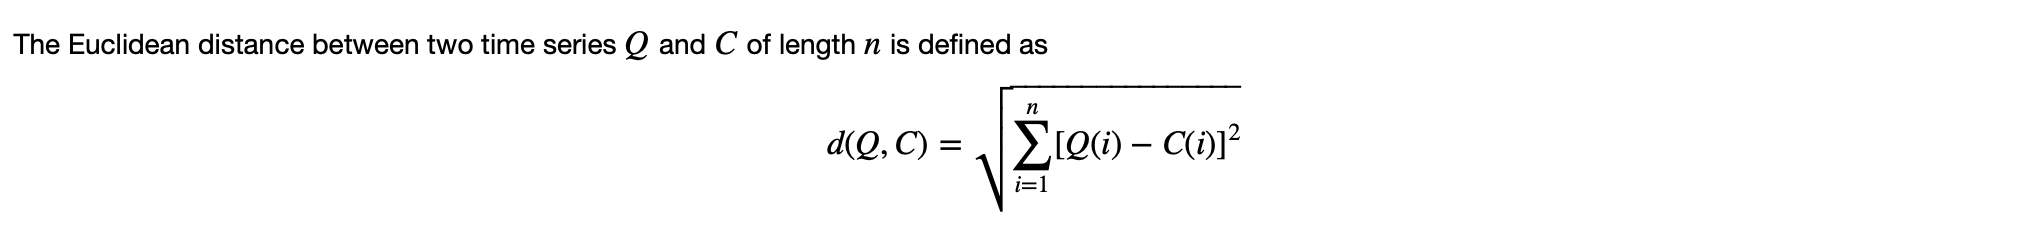

In [17]:
def euclid_dist(t1,t2):
    return math.sqrt(sum((t1-t2)**2))

In [18]:
print(euclid_dist(ts1,ts2))
print(euclid_dist(ts2,ts3))

26.95921603796934
17.29873508922759


## 动态时间弯曲距离 Dynamic Time Warping

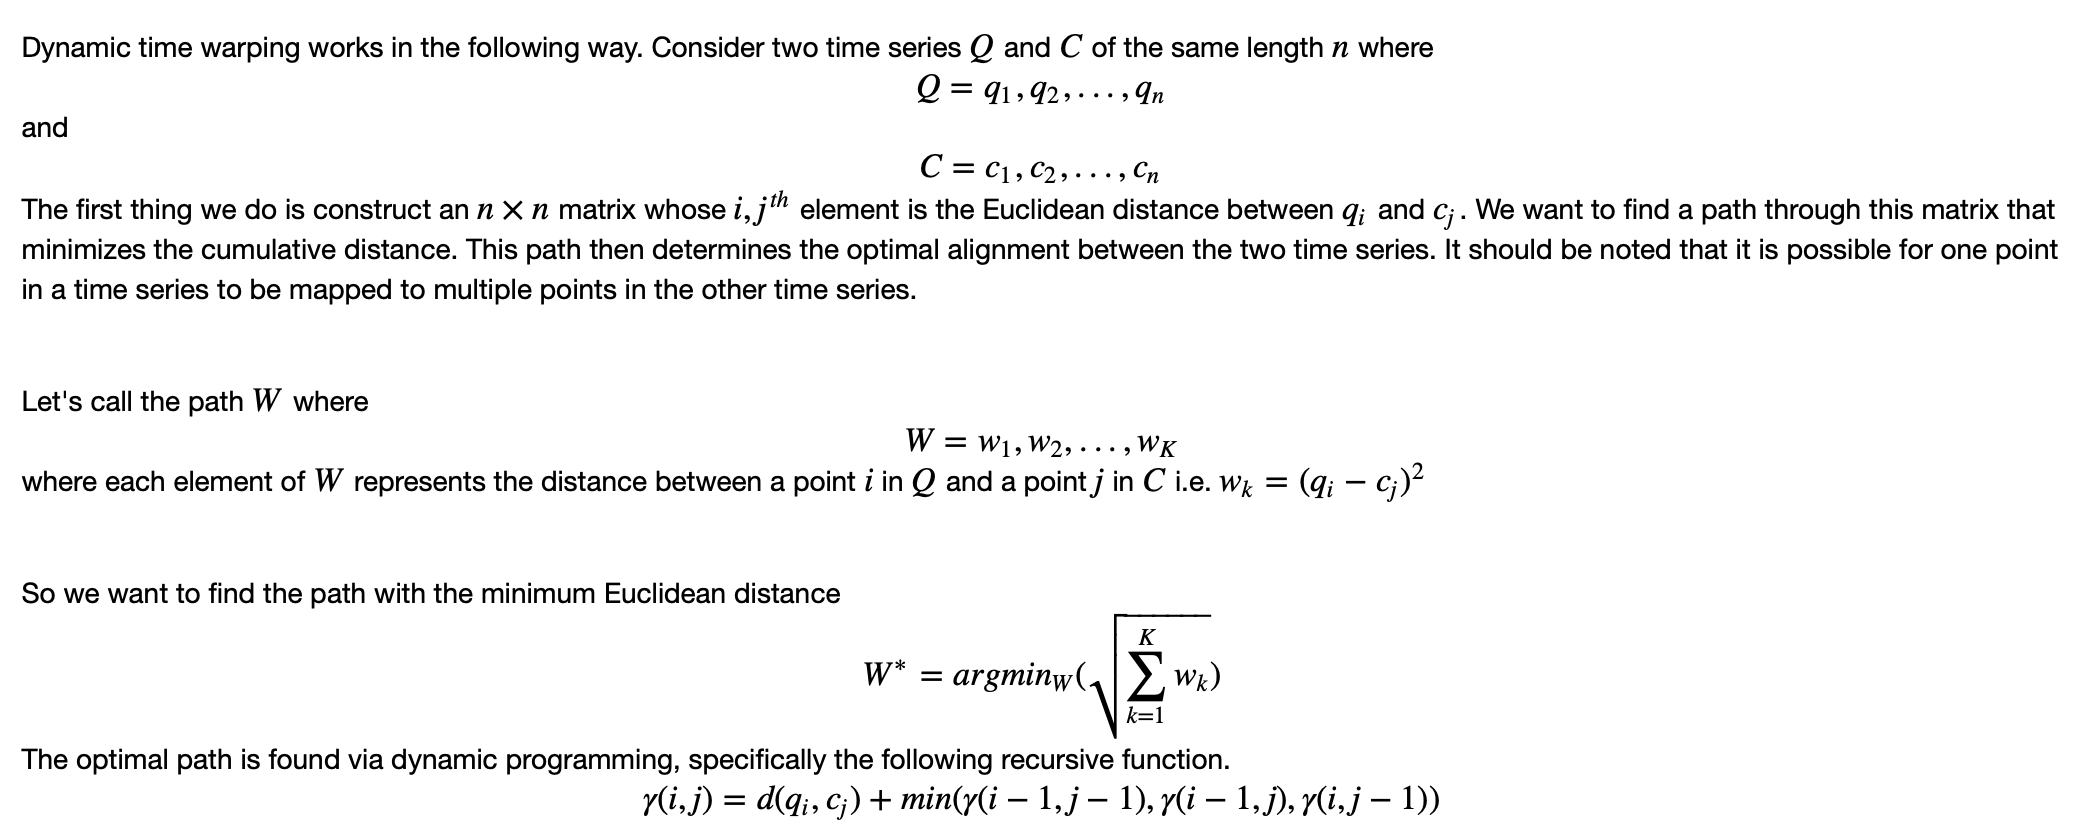

In [28]:
def DTWDistance(s1, s2):
    
    # 先构造的边缘
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [30]:
print(DTWDistance(ts1,ts2))
print(DTWDistance(ts1,ts3))
print(DTWDistance(ts2,ts3))

17.929718468641134
21.549494824404572
14.846846666395088


# 凝聚层次聚类

source：https://www.ibm.com/developerworks/cn/analytics/library/ba-1607-clustering-algorithm/index.html

层次聚类分为凝聚式层次聚类(Agglomerative clustering)和分裂式层次聚类(Divisive clustering)。
* 凝聚式层次聚类，就是在初始阶段将每一个点都视为一个簇，之后每一次合并两个最接近的簇，当然对于接近程度的定义则需要指定簇的邻近准则。
* 分裂式层次聚类，就是在初始阶段将所有的点视为一个簇，之后每次分裂出一个簇，直到最后剩下单个点的簇为止。

凝聚式层次聚类算法也是一个迭代的过程，算法流程如下：
* 每次选最近的两个簇合并，我们将这两个合并后的簇称之为合并簇。
* 若采用 MAX 准则，选择其他簇与合并簇中离得最远的两个点之间的距离作为簇之间的邻近度。若采用 MIN 准则，取其他簇与合并簇中离得最近的两个点之间的距离作为簇之间的邻近度。若组平均准则，取其他簇与合并簇所有点之间距离的平均值作为簇之间的邻近度。
* 重复步骤 1 和步骤 2，合并至只剩下一个簇

In [78]:
# 生成数据
import numpy as np
combined = np.vstack((ts1, ts2, ts3))
data = combined
len(data)

len(data) > 1
print("☞ 第 {} 次迭代\n".format(10 - len(data) + 1))
min_distance = float('inf') # 设定初始距离为无穷大
for i in range(len(data)):
    print("---")
    for j in range(i + 1, len(data)):
        distance = DTWDistance(data[i], data[j])
        print("计算 {} 与 {} 距离为 {}".format(data[i], data[j],distance))
        if distance < min_distance:
            min_distance = distance
            min_ij = (i, j)
            
i, j = min_ij # 最近数据点序号
data1 = data[i]
data2 = data[j]
data = np.delete(data, j, 0) # 删除原数据
data = np.delete(data, i, 0) # 删除原数据

☞ 第 8 次迭代

---
计算 [3.5        4.52416098 5.43330853 6.12534525 6.52255531 6.58033196
 6.29218688 5.69047881 4.84277964 3.84428612 2.80712922 1.84778181
 1.07397874 0.57261822 0.40000311 0.5755181  1.07945284 1.85521538
 2.81568748 3.85300797 4.85068562 5.69668107 6.29598892 6.5813068
 6.52059347 6.12066705 5.42643933 4.5158722  3.49122246 2.46755845
 1.55983777 0.8699976  0.47550709 0.42066757 0.71163754 1.31574102
 2.16513711 3.1644385  4.20142349 5.15963852 5.93147591 6.43025819
 6.59997204 6.42155858 5.91505366 5.13733786 4.17574877 3.138273
 2.14141923 1.29713427 0.70023146 0.41774307 0.48139259 0.88403216
 1.58044531 2.49242473 3.517555   4.54071384 5.44700037 6.13463847
 6.52640627 6.57830821 6.28451569 5.67802164 4.82693544 3.8268342
 2.79002943 1.83295445 1.06308894 0.5668889  0.40007767 0.58138817
 1.09045921 1.87012203 2.83282039 3.87044312 4.86646503 5.70903272
 6.30352571 6.58318235 6.51659715 6.11124766 5.41265466 4.49927027
 3.47366768 2.45102221 1.5461771  0.86074659 0.4

In [73]:
def agglomerative_clustering(data):
    
    while len(data) > 1:
        print("☞ 第 {} 次迭代\n".format(10 - len(data) + 1))
        min_distance = float('inf') # 设定初始距离为无穷大
        for i in range(len(data)):
            print("---")
            for j in range(i + 1, len(data)):
                distance = DTWDistance(data[i], data[j])
                print("计算 {} 与 {} 距离为 {}".format(data[i], data[j],distance))
                if distance < min_distance:
                    min_distance = distance
                    min_ij = (i, j)
        
        i, j = min_ij # 最近数据点序号
        data1 = data[i]
        data2 = data[j]
        data = np.delete(data, j, 0) # 删除原数据
        data = np.delete(data, i, 0) # 删除原数据
        
        b = np.atleast_2d([(data1[0] + data2[0]) / 2, (data1[1] + data2[1]) / 2]) # 计算两点新中心
        data = np.concatenate((data, b), axis=0) # 将新数据点添加到迭代过程
        print("\n最近距离:{} & {} = {}, 合并后中心:{}\n".format(data1, data2, min_distance, b))
        
    return data

agglomerative_clustering(data)

☞ 第 9 次迭代

---


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
data = datasets.make_blobs(10, n_features=2, centers=2, random_state=10)
len(data)

2

In [57]:
len(data)

2